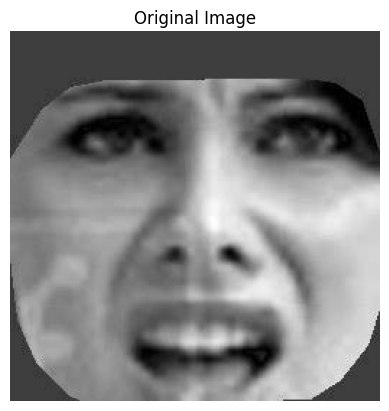

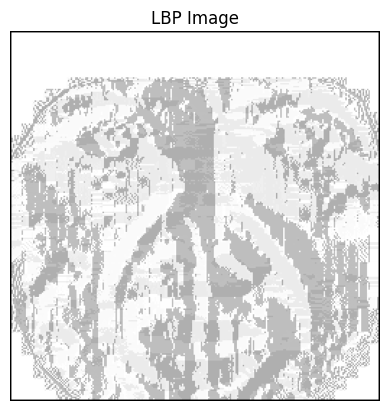

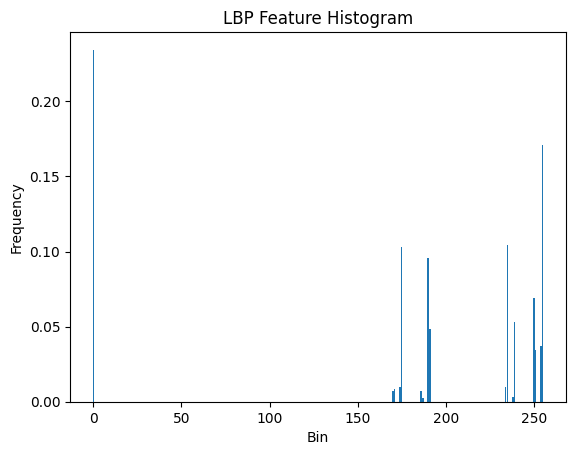

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define the LBP operator
def LBP(img):
    # Convert the image to grayscale
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Calculate the LBP image
    radius = 1
    n_points = 8 * radius
    lbp = np.zeros_like(img_gray)
    for i in range(radius, img_gray.shape[0]-radius):
        for j in range(radius, img_gray.shape[1]-radius):
            center = img_gray[i, j]
            pixel_values = [img_gray[i+int(radius*np.cos(2*np.pi*k/n_points)), j+int(radius*np.sin(2*np.pi*k/n_points))] for k in range(n_points)]
            binary_values = [1 if p >= center else 0 for p in pixel_values]
            lbp_code = sum([binary_values[k] * 2**k for k in range(n_points)])
            lbp[i, j] = lbp_code
            
    # Calculate the LBP histogram
    hist, _ = np.histogram(lbp.ravel(), bins=range(0, 2**n_points+1), range=(0, 2**n_points))
    return lbp, hist

# Load the image
img = cv2.imread('decoded.jpg')

# Split the image into small segments
segment_size = 16
segments = [img[i:i+segment_size, j:j+segment_size] for i in range(0, img.shape[0], segment_size) for j in range(0, img.shape[1], segment_size)]

# Calculate the LBP feature histogram for each segment
lbp_hist = np.zeros(256)
for seg in segments:
    lbp, hist = LBP(seg)
    lbp_hist += hist

# Combine the LBP feature histograms of each region into a single feature vector
feature_vector = lbp_hist / sum(lbp_hist)

# Show the original image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.show()

# Show the LBP image
lbp_img, _ = LBP(img)
plt.imshow(lbp_img, cmap='gray')
plt.title('LBP Image')
plt.axis('off')
plt.show()

# Show the LBP feature histogram
plt.bar(range(256), feature_vector)
plt.title('LBP Feature Histogram')
plt.xlabel('Bin')
plt.ylabel('Frequency')
plt.show()
